# Домашнее задание 3
## выполнила Лика Джиоева совместно с Людмилой Путятовой

# 1. Перевести разметку в датафрейм, подобный тому, что был на семинаре

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
from collections import Counter
from collections import OrderedDict
from os import path, getcwd
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords

In [2]:
with open('bravenewworld.txt', encoding='utf-8') as f:
    text = f.read()

In [3]:
tokens = word_tokenize(text)
morph = MorphAnalyzer()

In [133]:
pars = []
for t in tokens:
    anas = morph.parse(t)
    pars.append(anas)

In [122]:
def convert(tag):
    if tag is None:
        return tag
    else:
        return str(tag)

In [132]:
data = []

for i in pars:
    unit = i[0]
    data.append({'word': convert(unit.word), 'lex': convert(unit.normal_form), 
                 'POS': convert(unit.tag.POS), 'animacy': convert(unit.tag.animacy), 
                 'aspect': convert(unit.tag.aspect), 'case': convert(unit.tag.case),
                 'gender': convert(unit.tag.gender), 'involvement': convert(unit.tag.involvement), 
                 'mood': convert(unit.tag.mood), 'number': convert(unit.tag.number), 
                 'person': convert(unit.tag.person), 'tense': convert(unit.tag.tense),
                 'transitivity': convert(unit.tag.transitivity), 'voice': convert(unit.tag.voice)})

In [124]:
df = pd.DataFrame(data)
df.head(10)

,POS,animacy,aspect,case,gender,involvement,lex,mood,number,person,tense,transitivity,voice,word
0,NOUN,inan,None,nomn,masc,None,олдос,None,sing,None,None,None,None,олдос
1,NOUN,anim,None,nomn,None,None,хаксли,None,sing,None,None,None,None,хаксли
2,None,None,None,None,None,None,.,None,None,None,None,None,None,.
3,PREP,None,None,None,None,None,о,None,None,None,None,None,None,о
4,ADJF,None,None,nomn,masc,None,дивный,None,sing,None,None,None,None,дивный
5,ADJF,inan,None,accs,masc,None,новый,None,sing,None,None,None,None,новый
6,NOUN,inan,None,accs,masc,None,мир,None,sing,None,None,None,None,мир
7,None,None,None,None,None,None,--,None,None,None,None,None,None,--
8,None,None,None,None,None,None,--,None,None,None,None,None,None,--
9,None,None,None,None,None,None,--,None,None,None,None,None,None,--


# 2. Повторить какие-то из графиков с семинара на своих книжных данных

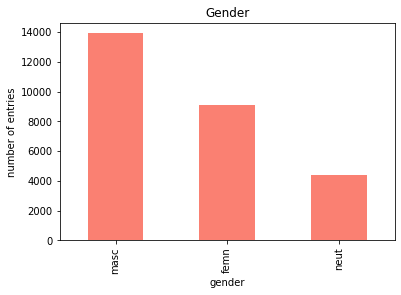

In [125]:
df['gender'].value_counts().plot.bar(color='salmon'); 
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries');

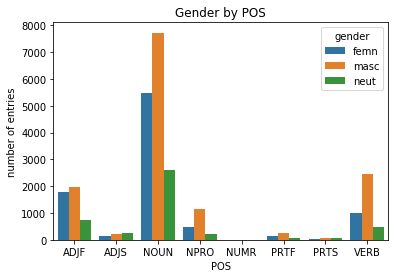

In [128]:
df2 = df[
    (df['gender'] != '') & (df['gender'] != 'мж')
][
    ['POS', 'gender', 'number']
].groupby(['POS', 'gender'], as_index=False).count()

df2.columns = ['POS', 'gender', 'total']
sns.barplot(x="POS", y="total", hue='gender', data=df2)
plt.title('Gender by POS')
plt.xlabel('POS')
plt.ylabel('number of entries');

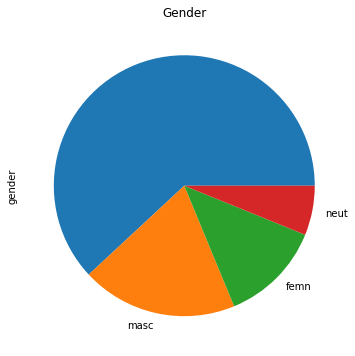

In [95]:
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot(kind='pie');
plt.title('Gender');

# 3. Придумать 2 своих визуализации, которые будут отличаться от того, что есть в конспекте

In [213]:
df2 = df[['animacy', 'case', 'gender']].groupby(['animacy', 'case'], as_index=False).count()
df2.columns = ['animacy', 'case', 'total']
df2 = df2[df2['total'] > 10]

распределения в группе, когда у нас есть падежи и частоты вхождений падежей одуш/неодуш лексем

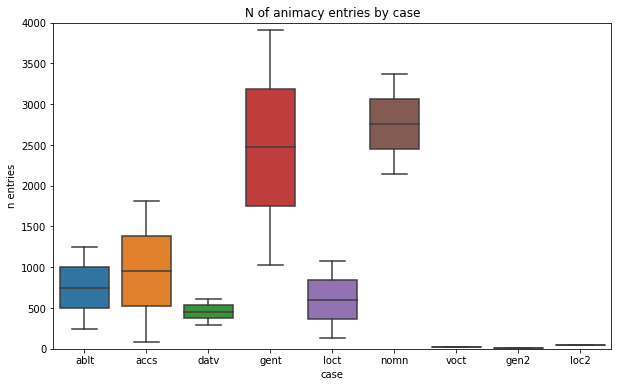

In [215]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="case", y="total", data=df2)
plt.ylim((0, 4000))
plt.title('N of animacy entries by case')
plt.ylabel('n entries')
plt.xlabel('case');

создаю облако лексем без стоп слов с фоном - лягушка пепе

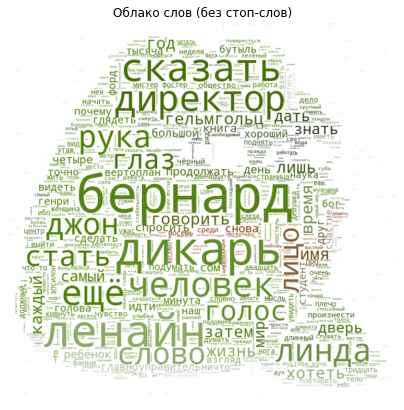

In [229]:
d = getcwd()

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])

text = ' '.join([word for word in df['lex'].values if word not in stops])
mask = np.array(Image.open(path.join(d, "pepe-the-frog-internet-meme-clip-art-frog.jpg")))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=100, random_state=42)
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Облако слов (без стоп-слов)')
_=plt.show()

# 4. Освоить nltk dispersion plot и сделать такой график по героям вашей книги

In [193]:
lem = []
for i in pars:
    first = i[0]
    lem.extend([first.normal_form])

In [190]:
lem1 = nltk.Text(lem)

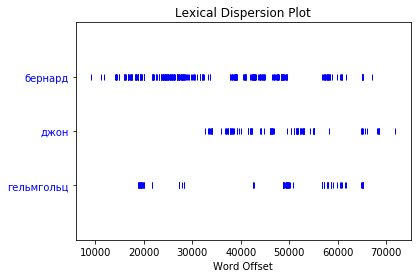

In [192]:
lem1.dispersion_plot(["бернард", "джон", "гельмгольц"])